In [301]:
import os
import json 
import pandas as pd 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
print(os.chdir("/mnt/scratch/smsarwar/better"))
def convert_result_string(result_string, method, query_type):
    result_string_splitted = result_string.strip().split("\t")
    result = []
    result.append(int(result_string_splitted[0]))
    result.append(float(result_string_splitted[1]))
    result.append(float(result_string_splitted[2]))
    result.append(float(result_string_splitted[3]))
    result.append(float(result_string_splitted[4]))
    result.append(method)
    result.append(query_type)
    return result
    

config = json.load(open("code/config/unsupervised_lm_config.json"))
data_directory = config["data"]
src_langs = ["chinese", "arabic"]
trg_lang = "english"
representations = ["", "", "bert"]
approaches = ["ql", "prf", "unsupervised_lm"]
query_types = ["sentences", "triggers", "combined_query", "fusion"]

all_df_array = []
    
for src_lang in src_langs:
    df_array = []
    for tuple in zip(approaches, representations):
        print(tuple)
        approach = tuple[0]
        representation = tuple[1]
        for query_type in query_types:
            result_file = None
            if os.path.exists(os.path.join(data_directory, trg_lang, "results", "data", src_lang, approach, representation, query_type, "output.res")):
                result_file = open(os.path.join(data_directory, trg_lang, "results", "data", src_lang, approach, representation, query_type, "output.res"))
                result_strings = result_file.readlines()
                data = []
                for result_string in result_strings:
                    if representation!="":
                        result = convert_result_string(result_string, approach.upper() + "_" + representation.upper(), query_type)
                    else:
                        result = convert_result_string(result_string, approach.upper(), query_type)
                    data.append(result)
                    #print(result)
                df = pd.DataFrame(data, columns = ["#Examples", "P@5", "P@10", "P@20", "MAP", "Method", "Query Type"])
                language_column = [src_lang + "-" + trg_lang for i in range(df.shape[0])]
                df["Language Pair"] = language_column                
                df_array.append(df)
                
            else:
                print(os.path.join(data_directory, trg_lang, "results", "data", src_lang, approach, representation, query_type, "output.res"))
    #print(df_array.shape)        
    all_df_array.append(pd.concat(df_array))
print(len(all_df_array))
print(all_df_array[0].shape)
all_df = pd.concat(all_df_array)

#print(set(list(all_df["Method"])))


None
('ql', '')
small_data/ace/english/results/data/chinese/ql/combined_query/output.res
small_data/ace/english/results/data/chinese/ql/fusion/output.res
('prf', '')
small_data/ace/english/results/data/chinese/prf/combined_query/output.res
small_data/ace/english/results/data/chinese/prf/fusion/output.res
('unsupervised_lm', 'bert')
small_data/ace/english/results/data/chinese/unsupervised_lm/bert/triggers/output.res
('ql', '')
small_data/ace/english/results/data/arabic/ql/combined_query/output.res
small_data/ace/english/results/data/arabic/ql/fusion/output.res
('prf', '')
small_data/ace/english/results/data/arabic/prf/combined_query/output.res
small_data/ace/english/results/data/arabic/prf/fusion/output.res
('unsupervised_lm', 'bert')
small_data/ace/english/results/data/arabic/unsupervised_lm/bert/triggers/output.res
2
(701, 8)


In [302]:
#all_df = pd.concat(df_array)
print(all_df.head())
print(set(list(all_df["Method"])))
all_df['Method'] = all_df['Method'].map({'QL': 'QL','PRF': 'RM3', 'UNSUPERVISED_LM_BERT': "SBERT"})
all_df['Language Pair'] = all_df['Language Pair'].map({'chinese-english': 'Chinese-English','arabic-english': 'Arabic-English'})

print(set(list(all_df["Method"])))
print(set(list(all_df["Query Type"])))

all_df['Query Type'] = all_df['Query Type'].map({'sentences': '-S','triggers': '-T', 'combined_query': '-ST (SRL)', 'fusion' : '-ST\n(SRL + Fusion)' })
all_df["Approaches"] = all_df["Method"] + all_df["Query Type"]
#all_df['Language Pair'] = all_df["Language Pair"] + all_df["Metric"]
all_df.shape

#Examples     P@5    P@10    P@20     MAP Method Query Type    Language Pair
0          7  0.2970  0.2939  0.2879  0.1714     QL  sentences  chinese-english
1          8  0.2727  0.2515  0.2485  0.1584     QL  sentences  chinese-english
2          5  0.1455  0.1758  0.1939  0.1346     QL  sentences  chinese-english
3          3  0.2667  0.2576  0.2394  0.1453     QL  sentences  chinese-english
4          4  0.2424  0.2394  0.2409  0.1432     QL  sentences  chinese-english
{'PRF', 'QL', 'UNSUPERVISED_LM_BERT'}
{'SBERT', 'QL', 'RM3'}
{'fusion', 'sentences', 'triggers', 'combined_query'}


(1401, 9)

In [303]:
metric = "P@5"
#sns_plot = sns.relplot(x="#examples", y=metric, col="query_type", row="method", height=4, kind="line", estimator=None, data=all_df)
#sns_plot.savefig(os.path.join(data_directory, trg_lang, "results", "figures", src_lang + "_" + metric + "_result.pdf"))

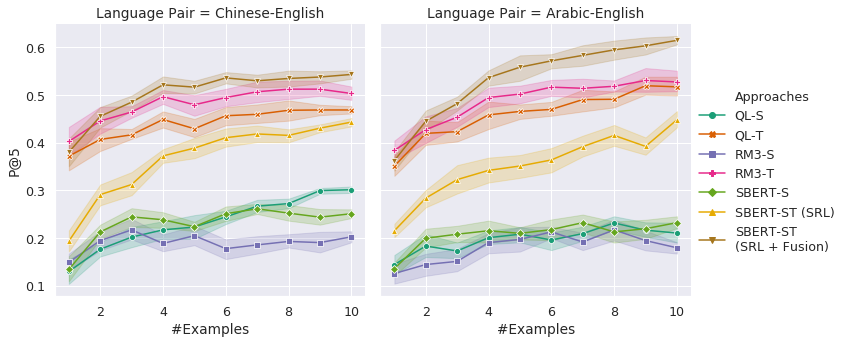

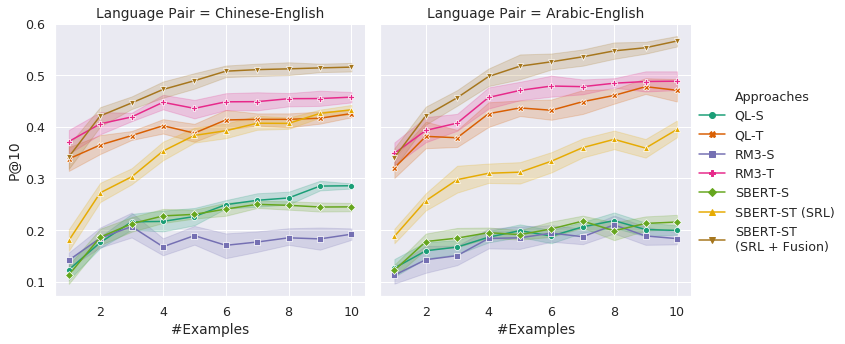

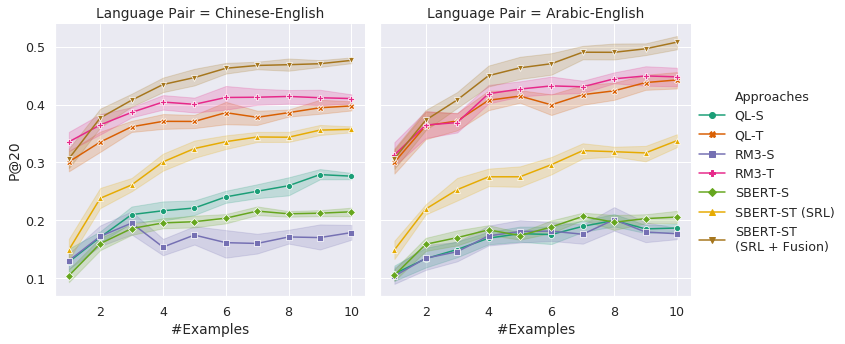

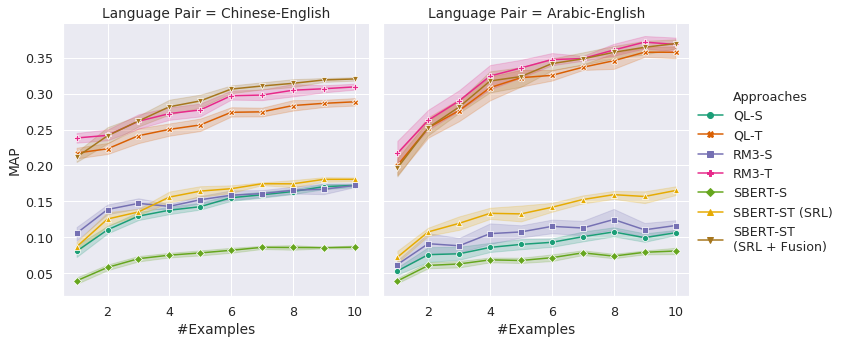

In [304]:
#sns.relplot(x="#Examples", y=metric, height=5, hue="Method", kind="line", data=all_df.loc[all_df["Query Type"]=="triggers"])
#col = ["P@5", "P@10", "P@20", "mAP"]
sns.set(font_scale=1.15)
# dash_styles = ["",
#                (4, 1.5),
#                (1, 1),
#                (3, 1, 1.5, 1),
#                (5, 1, 1, 1),
#                (4, 3, 4, 3, 4, 3),
#                (2, 2, 3, 1.5),
#                (1, 2.5, 3, 1.2)]


sns.hls_palette(8, l=.3, s=.8)
for metric in ["P@5", "P@10", "P@20", "MAP"]:
    #sns_plot = sns.relplot(x="#Examples", y=metric, height=5, col = "Language Pair", hue="Approaches", dashes = False, markers=[".", "o", "v", "^", "*", "+", "x"],  kind="line", data=all_df)
    sns_plot = sns.relplot(x="#Examples", y=metric, height=5, col = "Language Pair", hue="Approaches", style="Approaches", dashes=False, markers=True, palette=sns.color_palette("Dark2", 7), kind="line", data=all_df)

    sns_plot.savefig(os.path.join(data_directory, trg_lang, "results", "figures", metric + "_result.pdf"))

In [305]:
#sns.relplot(x="#Examples", y=metric, height=5, hue=["Method", "Query Type"], kind="line", data=all_df.loc[all_df["Query Type"]=="sentences"])